In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import xgboost as xg

# XG

In [19]:

df = pd.read_csv('/Users/marinelafargue/Desktop/projet calorie/data/df_encode_complete_OK.csv')

In [20]:
df.head(2)

,Unnamed: 0,age,height,weight,duration,heart_rate,body_temp,calorie,female,male,Height_meters,calculated_IMC
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1,1.90,26.038781
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0,1.66,21.773842


In [40]:
# Define the X (input) and y (target) features
#X = df.drop(["calorie","Unnamed: 0", "weight","female","male", "height", "duration" ,"Height_meters"], axis=1)
X = df.drop(["calorie","Unnamed: 0", "weight","female","male", "height", "duration" ,"Height_meters", "calculated_IMC", 'age', 'body_temp' ], axis=1)

y = df["calorie"]

In [41]:
test_size = 0.33
seed = 300
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
X_train.head(2)

,heart_rate
646,110.0
11946,97.0


In [43]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123) 

In [44]:
xgb_r.fit(X_train, y_train)

[12:44:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:08] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# verif avec cross val

scores = cross_val_score(xgb_r, X_train, y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

[12:44:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is no

In [46]:
# verif avec K fold

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.82


In [47]:
# Predict the model
pred = xgb_r.predict(X_test)

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  25.386962


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

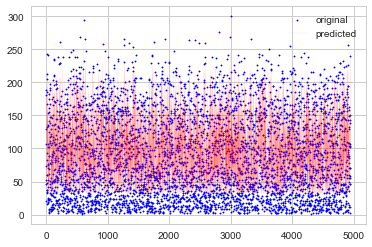

In [50]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=2, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.05, color="red", label="predicted")
plt.legend()
plt.show()